# LAB8 tutorial for Machine Learning <br >Neural NetWork & Pytorch
> The document description are designed by JIa Yanhong in 2022. Oct. 28th
------

## Objective

In this tutorial, we discuss building a simple convolutional neural network(CNN) with PyTorch to classify images into different classes. By the end of this tutorial, you become familiar with PyTorch, CNNs, padding, stride, max pooling and you are able to build your own CNN model for image classification.


- Familiar with the main operation and training process of convolutional neural network
- Learn to build CNN model for image classification
- Learning how to save and load models
- Understanding various architectures of Convolutional Networks
- Complete the LAB assignment and submit it to BB.
------

## Convolutional Neural Networks

In the beginning Neural Networks we used for all sorts of basic tasks like Regression and Classification.  As the quantity of data increased the parameters of `ANN` also increased.  With advancement in technology, Classification tasks were also required for `image` and `text` files ，but on using `ANN`, it was found that the computational powers sky-rocketed as the parameters increased to 100 thousands in numbers even for a small 8-bit image.  Therefore, there was a need for an another type of Neural Network .

<font color="blue" size=4 face="HEI">Let's see the problems ourselves !</font>

<div  align="center"> <img src="images/image-20221024210617842.png"  style="zoom:80%" align=center /></div>



Suppose we want to apply classifiction problems to a 32-bit image.  A RGB image would 32* 32*3= 3072 pixels.  Therefore, it will require a neural network with a input layer of 3072 Neurons. 
<div  align="center"> <img src="images/image02-16666170872581.png"  style="zoom:80%" align=center /></div>

<font face="HEI" color=green>A huge amount of computational power is required for this task!!</font>

<div  align="center"> <img src="images/image-20221028220135627.png"  style="zoom:80%" align=center /></div>

An image is just a matrix of pixels. Instead of flattening the image, what CNN does is, it uses Kernels/Filter to read the patterns in the image. 

A Kernel is a small matrix where each cell has certain value with which the pixel value is multiplied and the convolved feature is extracted. Below is the visual representation of this !

<div  align="center"> <img src="images/convolution.gif"  alt="convolution" style="zoom:80%" align=center /></div>

CNN was fist introduced by <big>Yann LeCun</big> (current Vice President of Facebook AI) to classify handwritten digits based on their 20x20 pixel images.

CNN is mainly used to work with visual data and is mostly used in Robotics and Computer Vision.



There are four main operations in a CNN:  

- Convolution  
  
- Non Linearity (ReLU)

- Pooling or Sub Sampling
  

- Classification (Fully Connected Layer)


### Convolution Layer
How convolution kernels work?
<div  align="center"> <img src="images/20190516152403576.gif"  alt="convolution" style="zoom:80%" align=center /></div>

The working principle of multi-channel multi-convolution kernel in convolution:

<div  align="center"> <img src="images/20190516152427819.gif"  alt="convolution" style="zoom:60%" align=center /></div>

Three hyperparameters control the size of the output : **depth(out_channels), stride,** and **padding**. 
#### Depth
Depth is the number of kernel, which affects the output channel.
<div  align="center"> <img src="images/image-20221028220930328.png"  alt="convolution" style="zoom:60%" align=center /></div>

#### Padding
While applying convolutions we will not obtain the output dimensions the same as input we will lose data over borders so we append a border of zeros and recalculate the convolution covering all the input values.
<div  align="center"> <img src="images/99433dnn4.gif"  style="zoom:80%" align=center /></div>

#### Stride
we must specify the stride with which we slide the filter.  When the stride is 1 then we move the filters one pixel at a time.  When the stride is 2 then the filters jump 2 pixels at a time as we slide them around.  
<div  align="center"> 
    <img src="images/20200312214447921.gif"  style="zoom:85%" align=center />
    <img src="images/92373dnn5.gif"  style="zoom:100%" align=center />
    <br>
   stride 1  &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;stride 2   
</div>


#### Output Size of Convolution
We have the following input:

- An image of dimensions  $W_{in} \times H_{in}$.

- A filter of dimensions $K \times K$

- Stride $S$ and padding $P$.

The output  will have the following dimensions:

+ $\mathbf{W_{out} = \frac{W_{in} - K + 2P}{S} + 1}$
+ $\mathbf{H_{out} = \frac{H_{in} - K + 2P}{S} + 1}$



### Activation functions or Non Linearity (ReLU)
The activation function is a node that is put at the end of or in between Neural Networks. **They help to decide if the neuron would fire or not**. We have different types of activation functions , but for this tutoral, my focus will be on **Rectified Linear Unit (ReLU)**
<div  align="center"> <img src="images/54331dnn7.png"  style="zoom:80%" align=center /></div>

### Pooling layer
Pooling layers, also known as downsampling, conducts dimensionality reduction, reducing the number of parameters in the input. Similar to the convolutional layer, the pooling operation sweeps a filter across the entire input, but the difference is that this filter does not have any weights.

There are two main types of pooling:
+ Max Pooling
<div  align="center"> <img src="images/Screenshot-2019-07-21-at-2.57.13-AM.png"  style="zoom:50%" align=center /></div>

+ Average pooling
  
<div  align="center"> <img src="images/Screenshot-2019-07-21-at-3.05.56-AM.png"  style="zoom:50%" align=center /></div>

### Fully connected layers

Finally, what we usually do is flatten the feature map into feature vectors and then feed it into the logistic regression unit or softmax unit.
<div  align="center"> 
    <img src="images/59467dnn9.jpg"  alt="LeNet-5" style="zoom:80%" align=center />
    <br>
    LeNet5
</div>


## PyTorch: Training your first Convolutional Neural Network (CNN) to classify images
A typical training procedure is as follows:

- Load and transform training and test datasets 
- Define a neural network (with learnable parameters, also called weights)
- Define an optimizer and loss criterion
  
- Train the network on the training data
  - Process input through the network Loop over our epochs and batches
  - Compute the loss (how far is the output from being correct)
  - Gradient reset
  - Propagate gradients back into network's parameters 
  - Update weights of network, a simple rule: 
      $$
      \begin{align}
      w = w + \Delta w\\
      \Delta w = -\eta\frac{\partial{E}}{\partial w} 


      
      \end{align}
      $$

      $w$: weight

      $\eta$: learning rate

      $\frac{\partial{E}}{\partial w}$: gradient

- Test the network on the test data
- Save Model
  




As you’ll see, training a CNN on an image dataset isn’t all that different from training a basic multi-layer perceptron (MLP) on numerical data. 

Next our goal is to quickly train a CNN(convolutional neural network) model going through all the trainning procedure. The idea here isn’t necessarily to introduce CNN or ML, but it is to get used to doing things in PyTorch. 

We use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), which is known as the "HelloWorld" of  neural networks.

### Importing the Libraries

Before loading the data,, let us  define some training hyperparameters. These are not parameters in the classical sense, but they do impact the solution that we end up at. 

In [1]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import warnings
warnings.filterwarnings("ignore") 
# CUSTOMARY IMPORTS
import torch
import torchvision
from  torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

# TRAINING HYPERPARAMETERS: 
n_epochs = 5           # How many passes through the training data  
batch_size = 64  # Training batch size usually in [1,256]

learning_rate = 0.01   # Learning rate for optimizer like SGD usually in [0.001, 0.1]

random_seed = 1  

torch.manual_seed(random_seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Load and transform datasets
In PyTorch we have a few concepts that can help ease the data setup process

1. **Dataset**: each dataset (like MNIST) will have a class which implements __getitem__() which returns an example (tuple)
2. **DataLoader**: takes a Dataset as input and outputs a generator or iterable object. One can use next() on a DataLoader object to get the next example from the dataset. The DataLoader can be setup to return a batch_size number of examples.
3. **Transforms**: `Transforms` can be used to <big>augment</big> the dataset by applying transformations such as `scaling`, `rotations`, `masking`, etc.  


Some basic transforms:

- `transforms.ToTensor()`: convers `PIL/Numpy` to Tensor format. It converts a PIL Image or `numpy.ndarray` with range `[0,255]` and shape `(H x W x C)` to a `torch.FloatTensor` of shape `(C x H x W)` and range `[0.0, 1.0]`. So this operation also rescales your data. It’s not a simple “ndarray –> tensor” operation.
- `transforms.Normalize()`: normalises each channel of the input Tensor. The formula is this: `input[channel] = (input[channel] - mean[channel]) / std[channel]`. You have to pass in two parameters: a sequence of means for each channel, and a sequence of standard deviations for each channel. In practice you see this called as `transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))` for the CIFAR10 example, rather than `transforms.Normalize((127.5,127.5,127.5), (some_std_here))` because it is put after `transforms.ToTensor()` and that rescales to 0-1.
- `transforms.Compose()`: the function that lets you chain together different transforms.


In [2]:
from  torchvision import transforms
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

For MNIST, the torchvision package has already implemented a Dataset called MNIST, where it will download the data for us automatically, if not already downloaded. 

Since the MNIST data is split up into different files, we also need to specify whether we wish to setup a train set DataLoader or a test set DataLoader.   

  


In [3]:
import torchvision
from  torchvision import transforms
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root = './datasets/',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './datasets/',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)



AttributeError: 'Compose' object has no attribute 'Compose'

Let's understand the code:

- Firstly, the MNIST data can't be used as it is for the LeNet5 architecture. The LeNet5 architecture accepts the input to be 32x32 and the MNIST images are 28x28. We can fix this by resizing the images, normalizing them using the pre-calculated mean and standard deviation (available online), and finally storing them as tensors.
- We set `download=True` incase the data is not already downloaded.
- Next, we make use of data loaders. This might not affect the performance in the case of a small dataset like MNIST, but it can really impede the performance in case of large datasets and is generally considered a good practice. Data loaders allow us to iterate through the data in batches, and the data is loaded while iterating and not at once in start.
- We specify the batch size and shuffle the dataset when loading so that every batch has some variance in the types of labels it has. This will increase the efficacy of our eventual model.

### Exploring Images

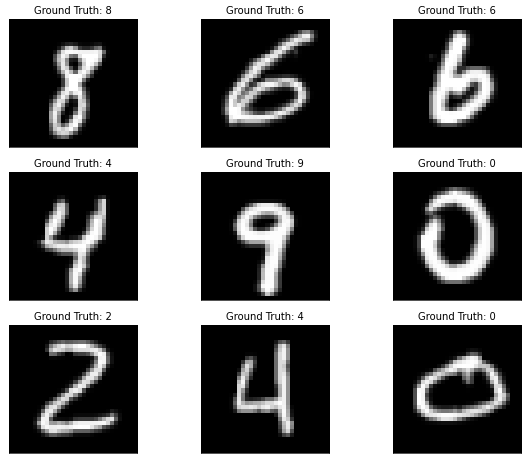

In [ ]:
# The enumerate() method adds a counter to an iterable and returns an enumerate object
examples = enumerate(test_loader)
batch_idx, (example_X, example_y) = next(examples)

# VISUALIZE SOME EXAMPLES
fig=plt.figure(figsize=(10, 8), dpi=60)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(example_X[i][0], cmap='gray')
  plt.title("Ground Truth: {}".format(example_y[i]))
  plt.xticks([])
  plt.yticks([])

### Define NetWork

All PyTorch models should inherit from the `nn. Module` (for automatic gradients and such).  Building models in PyTorch is like <big>Lego</big>, we take some layers or operations like `Conv2d`, `Linear`, and then compose them in a function called `forward` (which is required to be defined).  The `forward` function (also called prediction) takes the input and produces a output after processing through the model.  

Let's use the following network to classify digital images.
<div  align="center"> <img src="images\figure1-16669638154481.png"  alt="LeNet-5" style="zoom:60%" align=center /></div>
Actually, this simple network is called LeNet-5.

As the name indicates, LeNet5 has 5 layers with two convolutional and three fully connected layers. Let's start with the input. LeNet5 accepts as input a greyscale image of 32x32, indicating that the architecture is not suitable for RGB images (multiple channels). So the input image should contain just one channel. After this, we start with our convolutional layers

The first convolutional layer has a filter size of  5x5 with 6 such filters. This will reduce the width and height of the image while increasing the depth (number of channels). The output would be 28x28x6. After this, pooling is applied to decrease the feature map by half, i.e, 14x14x6. Same filter size (5x5) with 16 filters is now applied to the output followed by a pooling layer. This reduces the output feature map to 5x5x16.

After this, a convolutional layer of size 5x5 with 120 filters is applied to flatten the feature map to 120 values. Then comes the first fully connected layer, with 84 neurons. Finally, we have the output layer which has 10 output neurons, since the MNIST data have 10 classes for each of the represented 10 numerical digits.


In [ ]:
import warnings
warnings.filterwarnings("ignore") 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1,out_channels = 6,kernel_size = 5,stride = 1,padding = 0)
        self.conv2 = nn.Conv2d(in_channels = 6,out_channels = 16,kernel_size = 5,stride = 1,padding = 0)
        
        self.fc1 = nn.Linear(in_features = 5 * 5 * 16,out_features = 120)
        self.fc2 = nn.Linear(in_features = 120,out_features = 84)
        self.fc3 = nn.Linear(in_features = 84,out_features = 10)           # number of classes/digits = 10

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size = 2,stride = 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size = 2,stride = 2)
        
        x = x.reshape(x.size(0), -1)     # reshape

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.dropout(x, training=self.training)  # Apply dropout only during training
        x = self.fc3(x)
        return x


net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


The `torch.nn.functional` allows applying activation functions and dropout conveniently. We use the `nn.module` for layers that hold parameters and use the `functional API` for other operations like activations, softmax, etc.

In [ ]:
import warnings
warnings.filterwarnings("ignore") 

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # Layer 1  which has six kernels of size 5x5 with padding 0 and stride 1    
        # input (1, 28, 28) padding to(1,32,32) 
        # output(6, 28, 28)   
        self.conv_pool1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5, 5),padding=0),  
            #nn.BatchNorm2d(6),       
            nn.ReLU(),                     
            nn.MaxPool2d(2, stride=2)                 # output(6, 14, 14)
        )
       

        self.conv_pool2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),  # output(16, 10, 10)
            #nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)) # output(16, 5, 5)
        
        # the fully connected layer
        self.fc1 = nn.Sequential(                  
            nn.Linear(16*5*5, 120),
            nn.ReLU()
        )

     
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        # the output layer
        self.out = nn.Sequential(
            nn.Linear(84, 10),

        )

    # 前向传播
    def forward(self, x):

        x = self.conv_pool1(x)
        x = self.conv_pool2(x)
        x = x.view(x.size(0), -1)       # resize to 2-dims(batch_size, 16*5*5) 展平成1维
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x


net = Net().to(device)
print(net)

Net(
  (conv_pool1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
  )
  (out): Sequential(
    (0): Linear(in_features=84, out_features=10, bias=True)
  )
)


- [`Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d): PyTorch’s implementation of convolutional layers
- [`Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear): Fully connected layers
- [`MaxPool2d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d): Applies 2D max-pooling to reduce the spatial dimensions of the input volume
- [`ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU): Our ReLU activation function
- [`Softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax): Used when building our softmax classifier to return the predicted probabilities of each class
- [`flatten`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten): Flattens the output of a multi-dimensional volume (e.g., a CONV or POOL layer) such that we can apply fully connected layers to it.

The `torch.nn.Sequential` function automatically combines all layers into a single model, which makes it easier for beginners.

For a pytorch network, we just define `forward` function, and the `backward` function (where gradients are computed) will be automatically defined using `autograd` of pytorch. 

+ Finds all parameters of model: `nn.Module.parameters()` 

In [ ]:
params = list(net.parameters())
print(len(params)) # contains weights and bias
print(params[0].size()) # conv1's weight
print(params[1].size()) # conv1's bias

10
torch.Size([6, 1, 5, 5])
torch.Size([6])


+ Process input through model:`forward`

 Then, we can input a random $32\times32$ data . After forward propagation, in most cases, you should **clear the gradient buffers** of all parameters. 

In [ ]:
test = torch.randn((1, 1, 32, 32)).to(device)
pred = net(test) # forward
print(pred)


tensor([[ 0.0700, -0.0127, -0.1099,  0.0309,  0.0651, -0.0455,  0.0757, -0.0176,
         -0.0164, -0.0047]], device='cuda:0', grad_fn=<AddmmBackward0>)


One of the challenges in model specification with CNNs and Linear or Fully-Connected layers or MLP is keeping track of the image sizes as it goes through the operations. It is important to understand that the tensor passed to the model (during training or prediction) is of dimension (BatchSize, NumChannels, H, W) and when we refer to image size we are talking about (H,W). It is common to refer to channels as filters or also kernels.

### Optimizer & Loss Function


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(net.parameters())
#optimizer = optim.Adam(net.parameters(), lr=0.003)
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)

### Train the Model
#### Train the Model

In [ ]:
from tqdm import tqdm

#存储训练过程
history = {'Train Loss':[],'Test Loss':[],'Test Accuracy':[]}

for epoch in range(1, n_epochs + 1):
    #构建tqdm进度条
    processBar = tqdm(train_loader,unit = 'step')
    #打开网络的训练模式
    net.train(True)
    #开始对训练集的DataLoader进行迭代
    totalTrainLoss = 0.0
   
    for step,(trainImgs,labels) in enumerate(processBar):
        
        #将图像和标签传输进device中
        trainImgs = trainImgs.to(device)
        labels = labels.to(device)
        
        #清空模型的梯度
        optimizer.zero_grad()
        
        #对模型进行前向推理
        outputs = net(trainImgs)
        
        #计算本轮推理的Loss值
        loss = criterion(outputs,labels)
        #计算本轮推理的准确率
        predictions = torch.argmax(outputs, dim = 1)
        accuracy = torch.sum(predictions == labels)/labels.shape[0]
        
        #进行反向传播求出模型参数的梯度
        loss.backward()
        #使用迭代器更新模型权重
        optimizer.step()

        #将本step结果进行可视化处理
        processBar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f" % 
                                    (epoch,n_epochs,loss.item(),accuracy.item()))

        totalTrainLoss+= loss
        
        if step == len(processBar)-1:
            correct,totalLoss = 0,0
            totalSize = 0
            net.train(False)
            for testImgs,labels in test_loader:
                testImgs = testImgs.to(device)
                labels = labels.to(device)
                outputs = net(testImgs)
                loss = criterion(outputs,labels)
                predictions = torch.argmax(outputs,dim = 1)
                totalSize += labels.size(0)
                totalLoss += loss
                correct += torch.sum(predictions == labels)
            testAccuracy = correct/totalSize
            testLoss = totalLoss/len(test_loader)
            trainLoss = totalTrainLoss/len(train_loader)
            history['Train Loss'].append(trainLoss.item())
            history['Test Loss'].append(testLoss.item())
            history['Test Accuracy'].append(testAccuracy.item())
            processBar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f, Test Loss: %.4f, Test Acc: %.4f" % 
                                   (epoch,n_epochs,loss.item(),accuracy.item(),testLoss.item(),testAccuracy.item()))
    processBar.close()

[1/5] Loss: 0.0332, Acc: 1.0000, Test Loss: 0.0414, Test Acc: 0.9872: 100%|██████████| 938/938 [00:26<00:00, 35.73step/s]
[2/5] Loss: 0.0023, Acc: 1.0000, Test Loss: 0.0389, Test Acc: 0.9873: 100%|██████████| 938/938 [00:28<00:00, 32.98step/s]
[3/5] Loss: 0.0095, Acc: 0.9688, Test Loss: 0.0409, Test Acc: 0.9874: 100%|██████████| 938/938 [00:29<00:00, 31.61step/s]
[4/5] Loss: 0.0054, Acc: 1.0000, Test Loss: 0.0389, Test Acc: 0.9871: 100%|██████████| 938/938 [00:30<00:00, 30.54step/s]
[5/5] Loss: 0.0190, Acc: 0.9688, Test Loss: 0.0351, Test Acc: 0.9876: 100%|██████████| 938/938 [00:30<00:00, 30.91step/s]


Let's see what the code does:

- We start by iterating through the number of epochs, and then the batches in our training data.
- We convert the images and the labels according to the device we are using, i.e., GPU or CPU.
- In the forward pass, we make predictions using our model and calculate loss based on those predictions and our actual labels.
- Next, we do the backward pass where we actually update our weights to improve our model
- We then set the gradients to zero before every update using `optimizer.zero_grad()` function.
- Then, we calculate the new gradients using the `loss.backward()` function.
- And finally, we update the weights with the `optimizer.step()` function.

#### Check the GPU usage
When training the network, if you are using a GPU, you can view the GPU usage by typing nvidia-smi on the terminal , as shown in the following figure:
<div  align="center"> <img src="images/image-20221028155350117.png"  style="zoom:80%" align=center /></div>

### Loss and Accuracy Plots

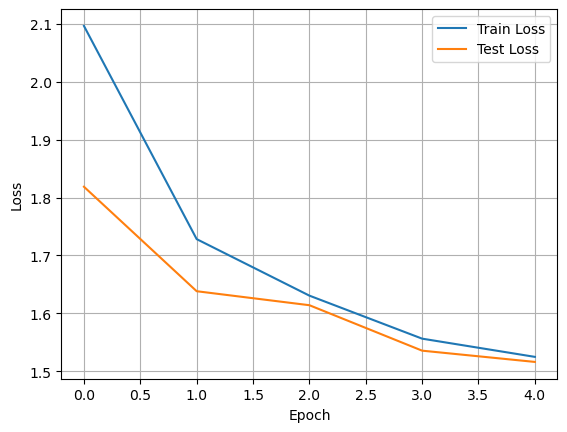

In [ ]:
#fig=plt.figure(figsize=(10, 8), dpi=60)
#对测试Loss进行可视化
plt.plot(history['Train Loss'],label = 'Train Loss')
plt.plot(history['Test Loss'],label = 'Test Loss')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



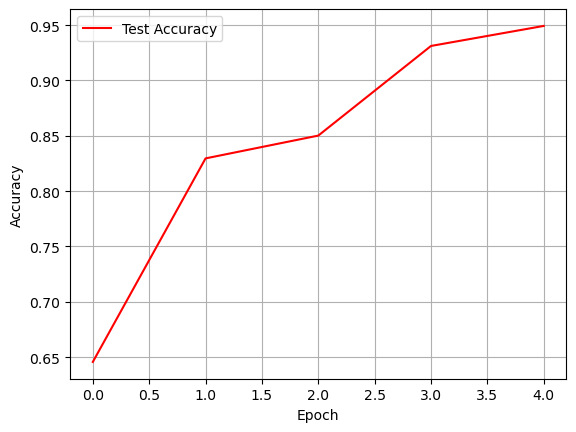

In [ ]:
#对测试准确率进行可视化
plt.plot(history['Test Accuracy'],color = 'red',label = 'Test Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Load and save the model
+ Load and save the model with the state dictionary (recommended).

In [ ]:
torch.save(net.state_dict(),'./models/mnist.pth')

In [ ]:
model = Net()
model.load_state_dict(torch.load('./models/mnist.pth'))
model.eval()

Net(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=3136, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)

Before making predictions, the `model.eval()` method must be called to set the `dropout` and `batch normalization` layers as validation models. Otherwise, your model generates inconsistent predictions.
 
+  Load and save the entire model
  

In [ ]:
torch.save(model, './models/mnist2.pth')

In [ ]:
# Model class must be defined somewhere
model = Net()
model = torch.load('./models/mnist2.pth')
model.eval()


Net(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=3136, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)

### Sample Test Predictions


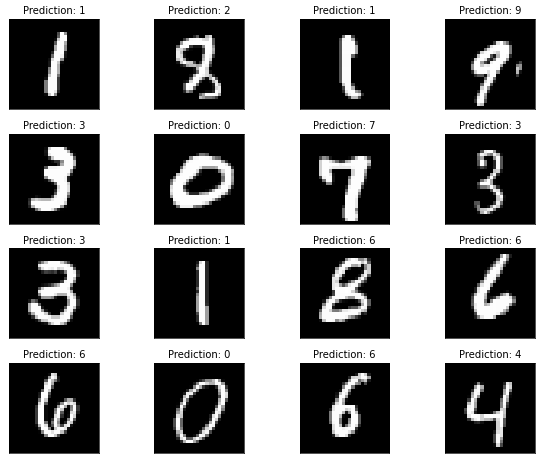

In [ ]:
dataiter = iter(test_loader)
images,labels = dataiter.next()

outputs  = model(images)
fig=plt.figure(figsize=(10, 8), dpi=60)
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray')
  plt.title("Prediction: {}".format(
    outputs.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])

# Understanding various architectures of Convolutional Networks

**Before starting we will see what are the architectures designed to date.** **These models were tested on ImageNet data where we have over a million images and 1000 classes to predict** 

![image-20221029175857201](images/image-20221029175857201.png)

 



<img src="images/B12158_03_05.jpg" alt="See the source image " style="zoom:130%;" />

`LeNet-5` is a very basic architecture for anyone to start with advanced architectures



> ILSVRC: ImageNet Large Scale Visual Recognition Challenge）




### AlexNet(2012)

**AlexNet was the winner of the ImageNet ILSVRC-2012 competition, designed by <big>Alex Krizhevsky, Ilya Sutskever and Geoffery E. Hinton</big>.**

This was one of the first Deep convolutional networks to achieve considerable accuracy on the 2012 ImageNet LSVRC-2012 challenge with an accuracy of 84.7% as compared to the second-best with an accuracy of 73.8%.  [Refer](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) to the original paper.





<div  align="center"> 
    <img src="images/1bD_DMBtKwveuzIkQTwjKQQ.png"  style="zoom:100%" align=center >
    <br>
    Alexnet Block Diagram
</div>



<div  align="center"> 
    <img src="images/1vXBvV_Unz3JAxytc5iSeoQ.png"  style="zoom:100%" align=center >
    
</div>



The network consists of 5 Convolutional (CONV) layers and 3 Fully Connected (FC) layers. The activation used is the Rectified Linear Unit (ReLU). The structural details of each layer in the network can be found in the table below.

- The input to the network is a batch of RGB images of size 227x227x3 and outputs a 1000x1 probability vector one corresponding to each class.
- Data augmentation is carried out to reduce over-fitting. This Data augmentation includes mirroring and cropping the images to increase the variation in the training data-set. The network uses an overlapped max-pooling layer after the first, second, and fifth CONV layers. Overlapped maxpool layers are simply maxpool layers with strides less than the window size. 3x3 maxpool layer is used with a stride of 2 hence creating overlapped receptive fields. This overlapping improved the top-1 and top-5 errors by 0.4% and 0.3%, respectively.

- Before AlexNet, the most commonly used activation functions were *sigmoid* and *tanh.* Due to the saturated nature of these functions, they suffer from the Vanishing Gradient (VG) problem and make it difficult for the network to train. AlexNet uses the *ReLU* activation function which doesn’t suffer from the VG problem. The original paper showed that the network with *ReLU* achieved a 25% error rate about 6 times faster than the same network with *tanh* non-linearity.
- Although ReLU helps with the vanishing gradient problem, due to its unbounded nature, the learned variables can become unnecessarily high. To prevent this, AlexNet introduced Local Response Normalization (LRN). The idea behind LRN is to carry out a normalization in a neighborhood of pixels amplifying the excited neuron while dampening the surrounding neurons at the same time.
- AlexNet also addresses the over-fitting problem by using drop-out layers where a connection is dropped during training with a probability of p=0.5. Although this avoids the network from over-fitting by helping it escape from bad local minima, the number of iterations required for convergence is doubled too.

## VGGNet(2014)

**The architecture developed by <big>Simonyan</big> and <big>Zisserman</big> was <big>the 1st runner up of the Visual Recognition Challenge of 2014 </big>.** 

The major shortcoming of too many hyper-parameters of AlexNet was solved by VGG Net by replacing large kernel-sized filters (11 and 5 in the first and second convolution layer, respectively) with multiple 3×3 kernel-sized filters one after another. 

Let’s consider the following example. Say we have an input layer of size 5x5x1. Implementing a conv layer with a kernel size of 5x5 and stride one will result in an output feature map of 1x1. The same output feature map can be obtained by implementing two 3x3 conv layers with a stride of 1 as shown below
<div  align="center"> 
    <img src="images/1C3TmzJI0Nm94NDy9IQg3Qg.png"  style="zoom:100%" align=center >
   
</div>


Now let’s look at the number of variables needed to be trained. For a 5x5 conv layer filter, the number of variables is 25. On the other hand, two conv layers of kernel size 3x3 have a total of 3x3x2=18 variables (a reduction of 28%).

Similarly, the effect of one 7x7 (11x11) conv layer can be achieved by implementing three (five) 3x3 conv layers with a stride of one. This reduces the number of trainable variables by 44.9% (62.8%). A reduced number of trainable variables means faster learning and more robust to over-fitting.



There are multiple variants of VGGNet (VGG16, VGG19, etc.) which differ only in the total number of layers in the network. The structural details of a VGG16 network have been shown below.



<div  align="center"> 
    <img src="images/1HzxRI1qHXjiVXla-_NiMBA.png"  style="zoom:100%" align=center >
    <br>
    VGG16 Block Diagram 
</div>

<div  align="center"> 
    <img src="images/11gA7d9svzp_jRHPsyy63Iw.png"  style="zoom:100%" align=center >
   
</div>



VGG16 has a total of 138 million parameters. The important point to note here is that all the conv kernels are of size 3x3 and maxpool kernels are of size 2x2 with a stride of two.



**Drawbacks of VGG Net:**

1. Long training time
2. Heavy model
3. Computationally expensive
4. Vanishing/exploding gradient problem

## Inception Net(2014)



Inception network also known as GoogleNet was proposed by developers at google in “Going Deeper with Convolutions” in 2014.

**GoogLeNet was the winner of the ImageNet ILSVRC-2014 competition.** Its main feature is that the network not only has depth, but also has width.

For better understanding refer to the image below:

<div  align="center"> 
    <img src="images\14ZYNeTDs3ss_fq_MKSq7zQ.png"  style="zoom:100%" align=center >
    <br>
    Inception Module 
</div>





Each inception module consists of four operations in parallel

- 1x1 conv layer
- 3x3 conv layer
- 5x5 conv layer
- max pooling

The 1x1 conv blocks shown in yellow are used for depth reduction. The results from the four parallel operations are then concatenated depth-wise to form the Filter Concatenation block (in green). There is multiple version of Inception, the simplest one being the GoogLeNet.

## ResNet(2015)

**ResNet, the winner of ILSVRC-2015 competition are deep networks of over 100 layers.** 

ResNet architecture makes use of shortcut connections to solve the vanishing gradient problem. The basic building block of ResNet is a Residual block that is repeated throughout the network.



<div  align="center"> 
    <img src="images/16WlIo8W1_Qc01hjWdZy-1Q.png"  style="zoom:100%" align=center >
    <br>
    Residual Block 
</div>



There are multiple versions of ResNetXX architectures where ‘XX’ denotes the number of layers. The most commonly used ones are ResNet50 and ResNet101. Since the vanishing gradient problem was t solved, , CNN started to get deeper and deeper. Below we present the structural details of ResNet18
<div  align="center"> 
    <img src="images/1DFDIdrXFYkaJLnefGJ-yKA.png"  style="zoom:100%" align=center >
    <br>
    Residual Block 
</div>



Resnet18 has around 11 million trainable parameters. It consists of CONV layers with filters of size 3x3 (just like VGGNet). Only two pooling layers are used throughout the network one at the beginning and the other at the end of the network. Identity connections are between every two CONV layers. 



## Summary

In the table below these four CNNs are sorted w.r.t their top-5 accuracy on the Imagenet dataset. The number of trainable parameters and the Floating Point Operations (FLOP) required for a forward pass can also be seen.

![img](images/1p-2QjvJ4nDCfn3F5oIxvYA.png)




## LAB Assignment
### Exercise 1  Image Classifier(100 points )
Follow the above instructions of Image Classifier Training with PyTorch to train your own image classifier (using the [CIFAR10 dataset](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). 

Please try to improve performance of classification by trying different network structures (add layers, modify parameters and so on) and different training strategies (loss function, optimizer and so on). 

<font color='red' size=5>Note: Your accuracy in this exercise will directly determine your score.</font>

### Exercise 2  Questions (10 points )
1. Can neural networks be used for unsupervised clustering or data dimension reduction? Why?

2. What are the strengths of neural networks; when do they perform well?

3. What are the weaknesses of neural networks; when do they perform poorly?

4. What makes neural networks a good candidate for the classification regression problem, if you have enough knowledge about the data?